In [1]:
import sys
import importlib as imp
if ('Jupytils' in sys.modules):
    reloaded = imp.reload(Jupytils)
else:
    import Jupytils
    from PIL import Image, ImageFilter,ImageEnhance 
#from pylocal import image_to_string


<IPython.core.display.Javascript object>

In [37]:

txt

'EquityGP\n\nHFT E 1\n\nRange _-mwer I Mav 11ng\nFarm I Lower I Mav Avg\n\n \n\n-- Currency -I\n\nI Events\n\n \n\nDay Sessian\n.Last Pryce 30125\nT High on 02/09/12 30177\n+Average 213 15%\n1 Law on 06/10/11 21 705\n\n  \n \n    \n\n \n\n \n\n \n\n \n\n \n\n59163111 \nscammus) 410nm\n\n \n\n \n\n \n\n \n\nII II III\nMar Aur May Jun Jul Aug saw on Nnv Dz: Jan Feb\n2011\n\n2012\n11151111111: 51 2 5777 Sean 511211 3311 3u11 osuu Eurpe 1 2n 733m 73mm Germany 15 65 s2u 121m Hong Kong 132 2577 suuu *\n1121 11 3 32u1 aauu Slngupre 65 5212 1uuu u s 1 212 311 2uuu Eupyrxgh 2u12 EloomheVg r1nunce 1 7\nSN 552171 251 gmrrs nu 5537737371 lSrFehrZDlZ Ba 11 12'

EquityGP
Document msftanalystrecomendations.gif upload complete. PFH<GU> to View. HSGA<GU
Save Chart Hide GP - Line Chart Page 1/?

E E
E! E! I


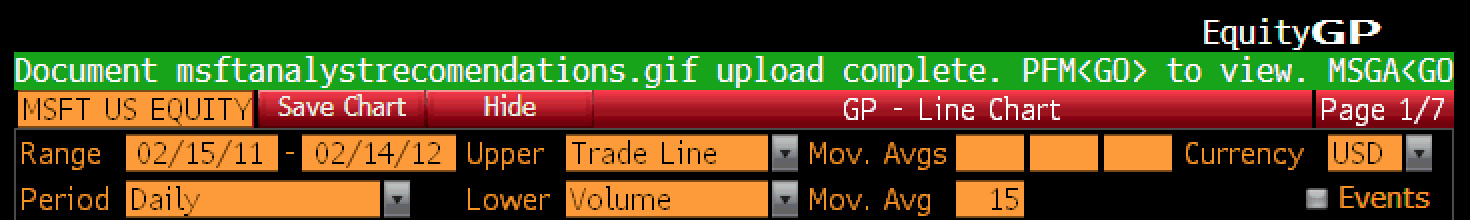

In [41]:
file='/Users/snarayan/Desktop/t2.png'
#file='/Users/snarayan/Desktop/test.gif'
im = Image.open(file)
#im = im.filter(ImageFilter.MedianFilter())
#enhancer = ImageEnhance.Contrast(im)
#im = enhancer.enhance(2)
#im = im.convert('1')
txt = image_to_string(im , lang='eng' )
txt =txt.decode('ascii', errors='ignore')
print(txt)
#print image_to_string(Image.open('~/Desktop/test.jpg'), lang='eng')
im

In [13]:
tesseract_cmd = 'tesseract'

try:
    import Image
except ImportError:
    from PIL import Image
import subprocess
import sys
import tempfile
import os
import shlex

__all__ = ['image_to_string']

def run_tesseract(input_filename, output_filename_base, lang=None, boxes=False, config=None):
    command = [tesseract_cmd, input_filename, output_filename_base]
    
    if lang is not None:
        command += ['-l', lang]

    if boxes:
        command += ['batch.nochop', 'makebox']
        
    if config:
        command += shlex.split(config)
    
    proc = subprocess.Popen(command,
            stderr=subprocess.PIPE)
    return (proc.wait(), proc.stderr.read())

def cleanup(filename):
    try:
        os.remove(filename)
    except OSError:
        pass

def get_errors(error_string):
    lines = error_string.splitlines()
    error_lines = tuple(line for line in lines if line.find('Error') >= 0)
    if len(error_lines) > 0:
        return '\n'.join(error_lines)
    else:
        return error_string.strip()

def tempnam():
    ''' returns a temporary file-name '''
    tmpfile = tempfile.NamedTemporaryFile(prefix="tess_")
    return tmpfile.name

class TesseractError(Exception):
    def __init__(self, status, message):
        self.status = status
        self.message = message
        self.args = (status, message)

from IPython.core.debugger import Tracer; 
def image_to_string(image, lang=None, boxes=False, config=None):
#    Tracer()()


    if len(image.split()) == 4:
        # In case we have 4 channels, lets discard the Alpha.
        # Kind of a hack, should fix in the future some time.
        r, g, b, a = image.split()
        image = Image.merge("RGB", (r, g, b))
    
    input_file_name = '%s.bmp' % tempnam()
    output_file_name_base = tempnam()
    if not boxes:
        output_file_name = '%s.txt' % output_file_name_base
    else:
        output_file_name = '%s.box' % output_file_name_base
    try:
        image.save(input_file_name)
        status, error_string = run_tesseract(input_file_name,
                                             output_file_name_base,
                                             lang=lang,
                                             boxes=boxes,
                                             config=config)
        if status:
            errors = get_errors(error_string)
            raise TesseractError(status, errors)
        f = open(output_file_name, "rb")
        try:
#            print(output_file_name)
            return f.read().strip()
        finally:
            f.close()
    finally:
        cleanup(input_file_name)
        cleanup(output_file_name)

